This is an example notebook with a simple test case to show how to run MABEL and how to use the machinery in MABEL to analyze the chains produced.

# Run MABEL

In [1]:
#Import packages

from mabel import mabel
import matplotlib.pyplot as plt

%matplotlib inline


There are two different ways to use MABEL, either using an input file (like the one that can be found in the folder input_files) or directly providing the input parameters as a dictionary to the MABEL class.

After importing mabel as above, the first way to use MABEL is straightforward.

```
path = [PATH TO YOUR INPUT FILE]
MABEL = mabel(path)
MABEL.run_MABEL(save=True)
```

After the run is finished, you will find your chains stored in the output destination specified in the input file, or, if you didn't give any, in output/[name of your input file].h5

Now we're going to run one test case inputing the parameters as a dictionary. We're running the simplest possible case (and for very low number of steps), but the potential of MABEL shines when running cases using expansion = 'spline' or expansion = 'flexknot'. Check run.py for more information about the required parameters in those cases.


In [2]:
#Define the input dictionary. Note that there are default parameters 
#(check run.py to see all parameters and their description)

input_dict = dict(sampler='zeus',nsteps = 100,
                 expansion = 'flatLCDM', 
                 lkls = dict(H0prior = True, rdprior = True,BAO = True, SN = True, 
                             Clocks = True),
                 output_root = "../output/test", verbose_data = True, verbose_run = False)

#Now call MABEL and run it
MABEL = mabel(input_dict)
MABEL.run_MABEL(save=True)

Initializing data!
Data included:
	 H0prior
	 rdprior
	 BAO
	 SN
	 Clocks
Type of expansion history assumed: flatLCDM


Initialising ensemble of 40 walkers...
/Users/jlbernal/opt/anaconda3/lib/python3.7/site-packages/deepdish/io/hdf5io.py:251: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif _pandas and isinstance(level, (pd.DataFrame, pd.Series, pd.Panel)):
/Users/jlbernal/opt/anaconda3/lib/python3.7/site-packages/tables/attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'expansion model'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
/Users/jlbernal/opt/anaconda3/lib/python3.7/site-packages/tables/attributeset.py:464: NaturalNameWarning: object name is not a valid Python identifier: 'chain stats'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; 

# Analyze the chains produced with MABEL


Here we show how to easily open the files containing MABEL chains and analyzing them. Check source/analyze.py for more information and possibilities

In [3]:
#These are the only MABEL dependences required to analyze:

from mabel import mabel_analyze
from source.utilities import find_max_mean_CLregions

In [4]:
#access to the chain with mabel_analyze(path,expansion type)
test = mabel_analyze('../output/test.h5','flatLCDM')

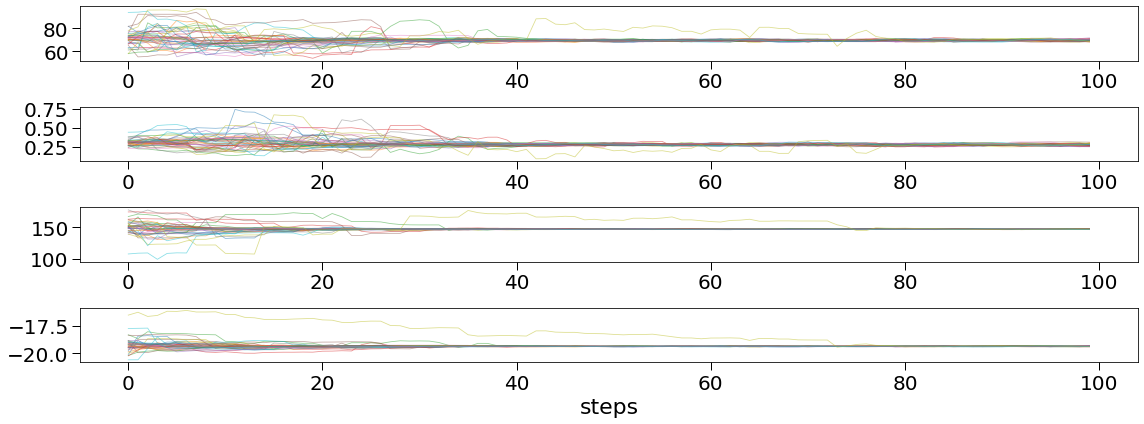

In [5]:
#visualize the walkers of the chain:
test.visualize_chain()

In [6]:
#Apply burn-in and thinning. Check zeus and emcee pages for tips on how to decide the burn-in and thinning sizes.
#Here we're using random values (since it's a test case with too short chains)
burnin = 30
thinning = 2
test.process(burnin=burnin,thinning=thinning)

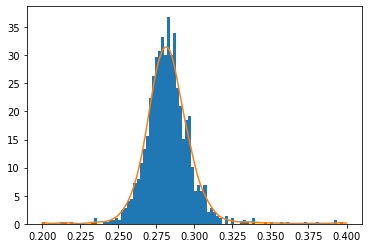

maxi = 0.2814814814814815, mean = 0.28272786990462023, 1sigma_low = 0.012812812812812824, 1sigma_high = 0.0134134134134134


In [9]:
#show the distribution and find the constraints at a desired confidence level
find_max_mean_CLregions(test.samples[:,1],bandwidth=0.2,CL=0.6829,
                            ranges=[0.2,0.4],printing=True,visual_check=True)

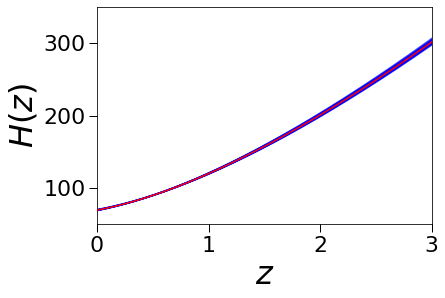

In [11]:
#Get some samples and plot the H(z) constraints
Nsamples = 50
test.get_Hz_samples(Nsamples=Nsamples)
for i in range(Nsamples):
    plt.plot(test.zdat,test.Hz_CLsamples[i],color='b',alpha=0.4,lw=1,zorder=2)
plt.plot(test.zdat,test.Hz_bestfit,color='r',alpha=1,lw=1.5,zorder=4)

plt.ylabel(r'$H(z)$',fontsize=32)
plt.xlabel(r'$z$',fontsize=32)
plt.tick_params(axis='both',width=1,length=8,labelsize=22)
plt.ylim(50,350)
plt.xlim(0,3)
plt.show()
